# Vamos a priorizar las siguientes hipótesis, lanzar un test A/B y analizar los resultados.

## Parte 1. Priorizar hipótesis

In [91]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

Primero, calculamos el ICE para cada hipótesis utilizando la fórmula:

ICE = (Impacto × Confianza) / Esfuerzo
​
 
Para esto:

- El Impacto mide cuánto afectaría la hipótesis a los usuarios.
- La Confianza mide cuánto creemos en la validez de la hipótesis.
- El Esfuerzo es una medida de los recursos necesarios para implementar la hipótesis.
- Ordenamos las hipótesis de mayor a menor puntuación ICE.

In [92]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

hypotheses.columns = hypotheses.columns.str.lower()

print(hypotheses.head(5))


                                          hypothesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   confidence  effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  


In [93]:
hypotheses['ICE'] = ((hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort'])

print(hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


Orden por ICE:
1. Lanzar una promoción que ofrece descuentos a usuarios en función del tamaño del pedido (ICE = 16.2)
2. Agregar dos nuevos canales para atraer tráfico (ICE = 13.33)
3. Agregar un formulario de suscripción en todas las páginas principales (ICE = 11.2)
4. Mostrar banners con ofertas y promociones actuales en el sitio web (ICE = 8.0)
5. Agregar bloques de recomendaciones de productos en la tienda (ICE = 7.0)

In [94]:
hypotheses['RICE'] = (hypotheses['reach']*hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']

print(hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


Orden por RICE:
1. Agregar un formulario de suscripción en todas las páginas principales (RICE = 112.0)
2. Agregar bloques de recomendaciones de productos en la tienda (RICE = 56.0)
3. Agregar dos nuevos canales para atraer tráfico (RICE = 40.0)
4. Mostrar banners con ofertas y promociones actuales en el sitio web (RICE = 40.0)
5. Lanzar una promoción que ofrece descuentos a usuarios en función del tamaño del pedido (RICE = 16.2)

## Cambios de Prioridad de ICE a RICE:

1. Agregar un formulario de suscripción.

- ICE Score: Este quedó en el tercer lugar en ICE, con una puntuación de 11.20.
- RICE Score: Sin embargo, al incluir el alcance, esta hipótesis subió al primer lugar con un puntaje de 112.0.
- El cambio de lugar ocurrió porque la hipótesis tiene un alto alcance. Al incluir Reach en la fórmula, el valor de RICE aumentó drásticamente, mostrando que esta hipótesis afecta a una gran cantidad de usuarios. Esto hace que la hipótesis sea prioritaria en términos de impacto general sobre los ingresos de la tienda.

2. Agregar bloques de recomendaciones de productos

- ICE Score: Esta hipótesis se encontraba en el quinto lugar en ICE, con un puntaje de 7.00.
- RICE Score: Con RICE, subió al segundo lugar con una puntuación de 56.0.
- El aumento en la prioridad se debe, nuevamente, al factor de alcance. La función de recomendación de productos tiene un alcance alto, y RICE le da prioridad porque un gran número de usuarios verían los beneficios de esta funcionalidad. En cambio, ICE no tiene en cuenta cuántas personas se verán afectadas y solo considera el esfuerzo, el impacto y la confianza.

3. Promoción de descuentos

- ICE Score: Esta hipótesis estaba en primer lugar en ICE con un puntaje de 16.2.
- RICE Score: En RICE, cayó al quinto lugar con el mismo puntaje de 16.2.
- Esta hipótesis, aunque tiene un alto impacto, confianza y un esfuerzo moderado, no afecta a tantos usuarios. Por lo tanto, sin un alcance significativo, se vuelve menos prioritaria cuando el objetivo es maximizar el alcance, como lo hace RICE.

### Resumen de Cambios entre ICE y RICE
Las hipótesis que afectan a una amplia base de usuarios tienen una mayor prioridad en RICE debido al valor agregado del alcance. Esto hace que RICE sea más adecuado para proyectos en los que es importante el volumen de usuarios que experimentarán el cambio, mientras que ICE es más efectivo cuando el alcance no es una variable clave.

## Parte 2. Análisis del test A/B

In [95]:
orders = pd.read_csv('/datasets/orders_us.csv')
orders['date'] = pd.to_datetime(orders['date'])
orders.columns = orders.columns.str.lower()

visits = pd.read_csv('/datasets/visits_us.csv')
visits['date'] = pd.to_datetime(visits['date'])

orders, visits

(      transactionid   visitorid       date  revenue group
 0        3667963787  3312258926 2019-08-15     30.4     B
 1        2804400009  3642806036 2019-08-15     15.2     B
 2        2961555356  4069496402 2019-08-15     10.2     A
 3        3797467345  1196621759 2019-08-15    155.1     B
 4        2282983706  2322279887 2019-08-15     40.5     B
 ...             ...         ...        ...      ...   ...
 1192     2662137336  3733762160 2019-08-14    100.8     B
 1193     2203539145   370388673 2019-08-14     50.1     A
 1194     1807773912   573423106 2019-08-14    165.3     A
 1195     1947021204  1614305549 2019-08-14      5.5     A
 1196     3936777065  2108080724 2019-08-15   3120.1     B
 
 [1197 rows x 5 columns],
          date group  visits
 0  2019-08-01     A     719
 1  2019-08-02     A     619
 2  2019-08-03     A     507
 3  2019-08-04     A     717
 4  2019-08-05     A     756
 ..        ...   ...     ...
 57 2019-08-27     B     720
 58 2019-08-28     B     654
 59

### 1. Representa gráficamente el ingreso acumulado por grupo.

In [96]:
daily_revenue = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()

daily_revenue['cumulative_revenue'] = daily_revenue.groupby('group')['revenue'].cumsum()

cumulative_revenue_A = cumulative_revenue[cumulative_revenue['group'] == 'A']
cumulative_revenue_B = cumulative_revenue[cumulative_revenue['group'] == 'B']


In [97]:
print("Ingreso acumulado Grupo A:")
print(cumulative_revenue_A[['date', 'revenue']])

Ingreso acumulado Grupo A:
         date   revenue
0  2019-08-01    2356.8
2  2019-08-02    5480.3
4  2019-08-03    9919.3
6  2019-08-04   12872.7
8  2019-08-05   16578.1
10 2019-08-06   18862.9
12 2019-08-07   24912.2
14 2019-08-08   29974.1
16 2019-08-09   36409.0
18 2019-08-10   42255.3
20 2019-08-11   45205.4
22 2019-08-12   49977.4
24 2019-08-13   56320.0
26 2019-08-14   59294.8
28 2019-08-15   63414.7
30 2019-08-16   70375.7
32 2019-08-17   73878.9
34 2019-08-18   76332.2
36 2019-08-19   80366.2
38 2019-08-20  103663.4
40 2019-08-21  108743.5
42 2019-08-22  113082.7
44 2019-08-23  117531.5
46 2019-08-24  121333.7
48 2019-08-25  123939.8
50 2019-08-26  128031.1
52 2019-08-27  135442.6
54 2019-08-28  139365.0
56 2019-08-29  145918.5
58 2019-08-30  150906.5
60 2019-08-31  155291.2


In [98]:
print("Ingreso acumulado Grupo B:")
print(cumulative_revenue_B[['date', 'revenue']])

Ingreso acumulado Grupo B:
         date   revenue
1  2019-08-01    3976.8
3  2019-08-02    8104.1
5  2019-08-03   11726.1
7  2019-08-04   14590.0
9  2019-08-05   18073.1
11 2019-08-06   22669.3
13 2019-08-07   28443.7
15 2019-08-08   33461.9
17 2019-08-09   38967.1
19 2019-08-10   43975.7
21 2019-08-11   46066.6
23 2019-08-12   52223.1
25 2019-08-13   58230.0
27 2019-08-14   62006.5
29 2019-08-15   68776.6
31 2019-08-16   73073.4
33 2019-08-17   75160.4
35 2019-08-18   77377.1
37 2019-08-19  102431.1
39 2019-08-20  105988.0
41 2019-08-21  111299.4
43 2019-08-22  115643.5
45 2019-08-23  119331.0
47 2019-08-24  122860.9
49 2019-08-25  125566.3
51 2019-08-26  130931.5
53 2019-08-27  137762.4
55 2019-08-28  140923.0
57 2019-08-29  149542.2
59 2019-08-30  154299.8
61 2019-08-31  157395.5


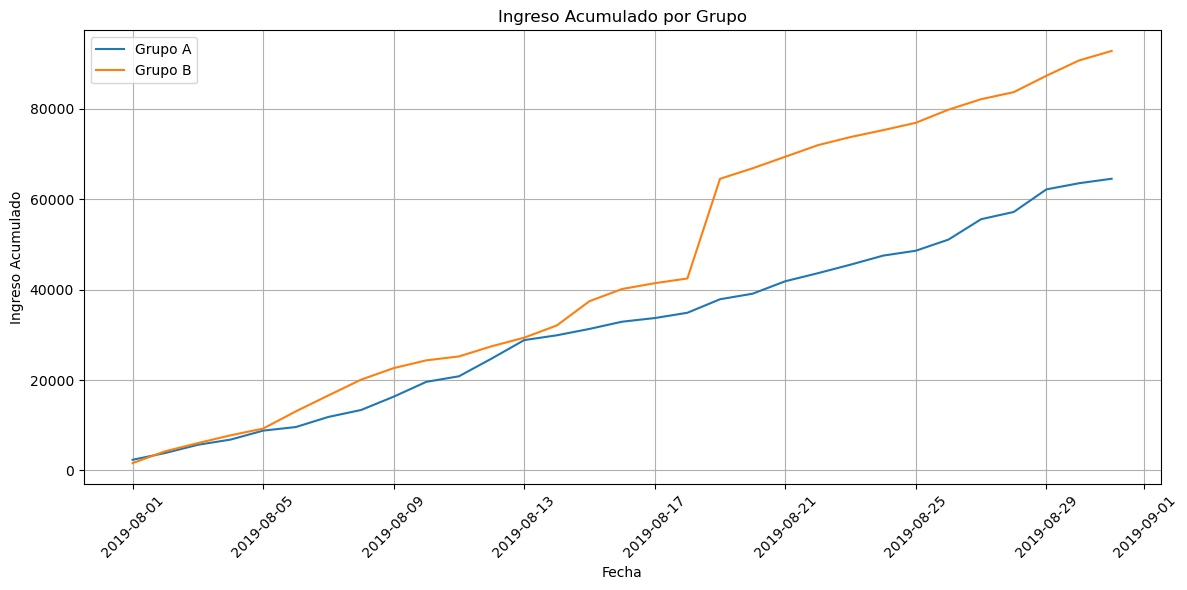

In [99]:
plt.figure(figsize=(12, 6))
for group in daily_revenue['group'].unique():
    group_data = daily_revenue[daily_revenue['group'] == group]
    plt.plot(group_data['date'], group_data['cumulative_revenue'], label=f'Grupo {group}')

plt.title('Ingreso Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Podemos observar que desde el inicio el grupo B mantiene un mayor número de ingreso acumulado, dando un gran pico después de la fecha '2019-08-17', auqnue bien puede deberse a valores anómalos.

### 2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo.

In [100]:
# Calcular el tamaño promedio de pedido diario por grupo
daily_avg_order_size = orders.groupby(['date', 'group'])['revenue'].mean().reset_index()

avg_order_A = daily_avg_order_size[daily_avg_order_size['group'] == 'A']
avg_order_B = daily_avg_order_size[daily_avg_order_size['group'] == 'B']

In [101]:
print("Tamaño de pedido promedio Grupo A:")
print(avg_order_A)

Tamaño de pedido promedio Grupo A:
         date group     revenue
0  2019-08-01     A   98.200000
2  2019-08-02     A   75.175000
4  2019-08-03     A   75.633333
6  2019-08-04     A   71.662500
8  2019-08-05     A   79.524000
10 2019-08-06     A   43.877778
12 2019-08-07     A  124.605556
14 2019-08-08     A   95.650000
16 2019-08-09     A  184.193750
18 2019-08-10     A  205.512500
20 2019-08-11     A   94.592308
22 2019-08-12     A  162.950000
24 2019-08-13     A  292.635714
26 2019-08-14     A   44.366667
28 2019-08-15     A   93.880000
30 2019-08-16     A   88.838889
32 2019-08-17     A   80.550000
34 2019-08-18     A   68.929412
36 2019-08-19     A  135.868182
38 2019-08-20     A  102.691667
40 2019-08-21     A  119.804348
42 2019-08-22     A  111.456250
44 2019-08-23     A   75.520000
46 2019-08-24     A  133.513333
48 2019-08-25     A  107.890000
50 2019-08-26     A  154.050000
52 2019-08-27     A  161.110714
54 2019-08-28     A   94.270588
56 2019-08-29     A  227.068182
58 20

In [102]:
print("Tamaño de pedido promedio Grupo B:")
print(avg_order_B)

Tamaño de pedido promedio Grupo B:
         date group      revenue
1  2019-08-01     B    77.142857
3  2019-08-02     B   109.325000
5  2019-08-03     B   112.925000
7  2019-08-04     B   101.017647
9  2019-08-05     B    65.000000
11 2019-08-06     B   135.942857
13 2019-08-07     B   147.145833
15 2019-08-08     B   129.177778
17 2019-08-09     B   102.324000
19 2019-08-10     B    74.800000
21 2019-08-11     B    66.246154
23 2019-08-12     B    97.639130
25 2019-08-13     B    90.952381
27 2019-08-14     B   117.900000
29 2019-08-15     B   172.964516
31 2019-08-16     B   134.885000
33 2019-08-17     B    91.535714
35 2019-08-18     B   116.100000
37 2019-08-19     B  1050.709524
39 2019-08-20     B   116.230000
41 2019-08-21     B   182.564286
43 2019-08-22     B   102.432000
45 2019-08-23     B   119.966667
47 2019-08-24     B    95.450000
49 2019-08-25     B   116.178571
51 2019-08-26     B   116.016000
53 2019-08-27     B   144.987500
55 2019-08-28     B    55.642857
57 2019-

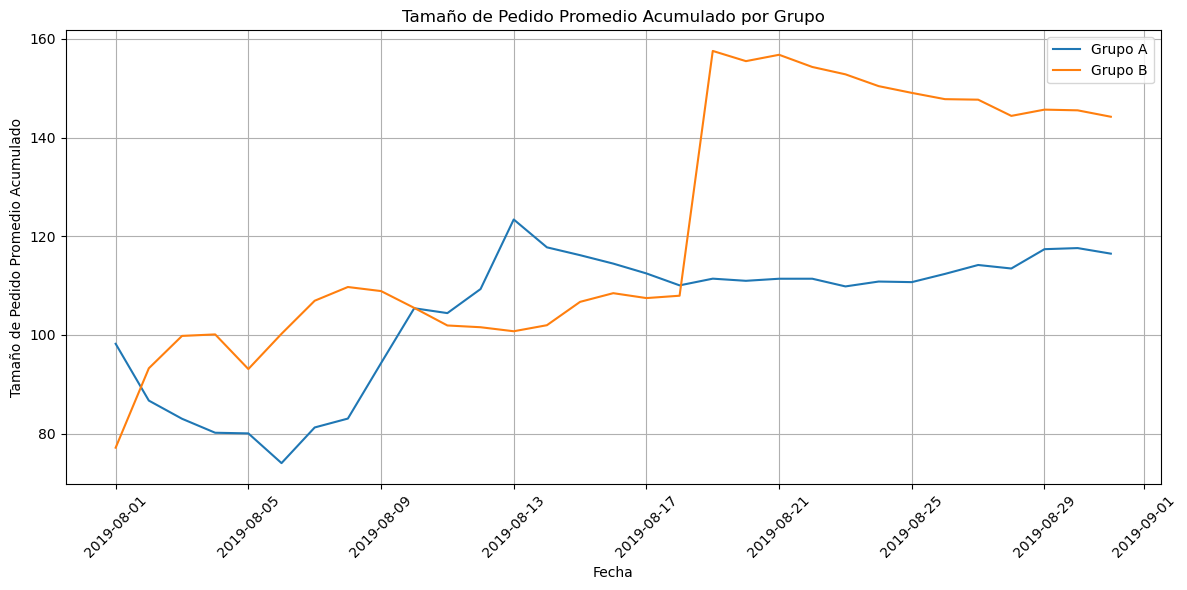

In [103]:
# Calcular el tamaño promedio de pedido acumulado
daily_avg_order_size['cumulative_avg_order_size'] = daily_avg_order_size.groupby('group')['revenue'].cumsum() / (daily_avg_order_size.groupby('group').cumcount() + 1)

plt.figure(figsize=(12, 6))
for group in daily_avg_order_size['group'].unique():
    group_data = daily_avg_order_size[daily_avg_order_size['group'] == group]
    plt.plot(group_data['date'], group_data['cumulative_avg_order_size'], label=f'Grupo {group}')

plt.title('Tamaño de Pedido Promedio Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de Pedido Promedio Acumulado')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

En el gráfico podemos observar la fluctuación en los tamaños promedio en ambos grupos, pero desentonados por ese pico bastante importante en el grupo B, coincide con los ingresos observados en el gráfico anterior, así que podemos concluir que en efecto, existen valores anómalos.

### 3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

In [104]:
group_a = daily_avg_order_size[daily_avg_order_size['group'] == 'A']
group_b = daily_avg_order_size[daily_avg_order_size['group'] == 'B']

merged_groups = pd.merge(group_a[['date', 'cumulative_avg_order_size']],
                         group_b[['date', 'cumulative_avg_order_size']],
                         on='date', suffixes=('_A', '_B'))

In [105]:
merged_groups['relative_difference'] = (
    (merged_groups['cumulative_avg_order_size_B'] - merged_groups['cumulative_avg_order_size_A']) 
    / merged_groups['cumulative_avg_order_size_A']
)
print(merged_groups['relative_difference'])

0    -0.214431
1     0.075518
2     0.202341
3     0.248665
4     0.162960
5     0.354178
6     0.316209
7     0.321150
8     0.154951
9     0.000727
10   -0.024011
11   -0.070824
12   -0.183625
13   -0.134079
14   -0.081469
15   -0.052373
16   -0.044420
17   -0.019060
18    0.414376
19    0.401303
20    0.407579
21    0.385360
22    0.391434
23    0.357473
24    0.346532
25    0.315241
26    0.293535
27    0.272667
28    0.240999
29    0.237447
30    0.238273
Name: relative_difference, dtype: float64


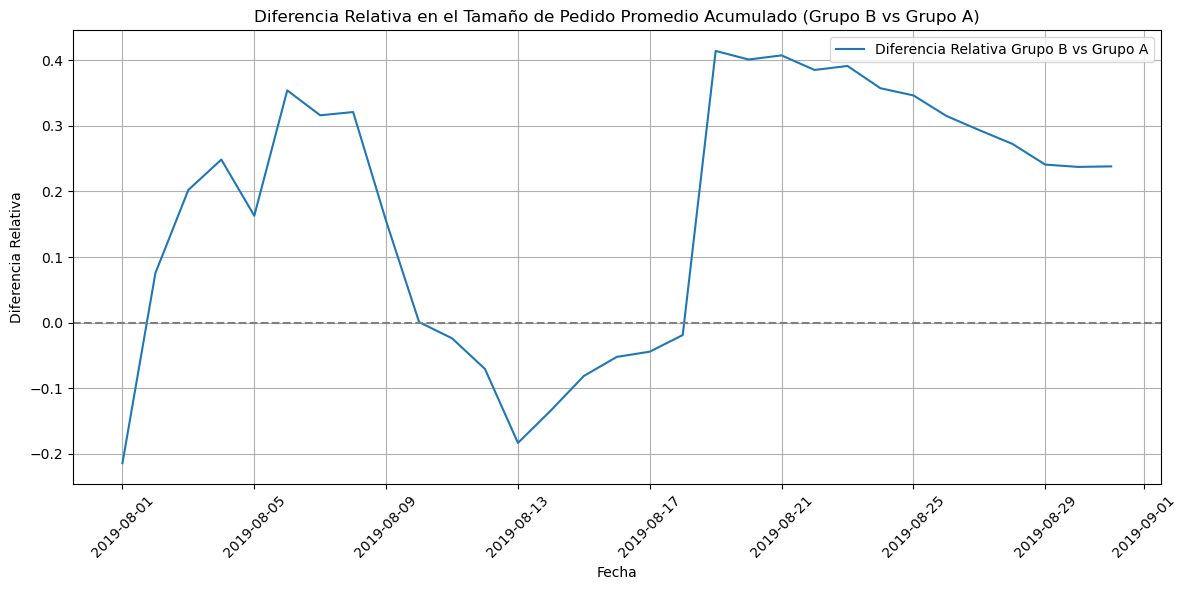

In [106]:
plt.figure(figsize=(12, 6))
plt.plot(merged_groups['date'], merged_groups['relative_difference'], label='Diferencia Relativa Grupo B vs Grupo A')
plt.axhline(y=0, color='gray', linestyle='--')  # Línea de referencia en 0
plt.title('Diferencia Relativa en el Tamaño de Pedido Promedio Acumulado (Grupo B vs Grupo A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

Podemos concluir que el grupo B tiene un rendimiento superior en cuanto al tamaño promedio de pedido acumulado.

### 4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia.

In [107]:
#Calcular el número de pedidos diarios por grupo
daily_orders = orders.groupby(['date', 'group']).size().reset_index(name='orders')

# Unir los datos de visitas con los pedidos por día y grupo
daily_data = pd.merge(visits, daily_orders, on=['date', 'group'], how='left').fillna(0)

# Calcular la tasa de conversión diaria
daily_data['conversion_rate'] = daily_data['orders'] / daily_data['visits']

conversion_A = daily_data[daily_data['group'] == 'A']
conversion_B = daily_data[daily_data['group'] == 'B']

In [108]:
print("Tasa de conversión Grupo A:")
print(conversion_A)

Tasa de conversión Grupo A:
         date group  visits  orders  conversion_rate
0  2019-08-01     A     719      24         0.033380
1  2019-08-02     A     619      20         0.032310
2  2019-08-03     A     507      24         0.047337
3  2019-08-04     A     717      16         0.022315
4  2019-08-05     A     756      25         0.033069
5  2019-08-06     A     667      18         0.026987
6  2019-08-07     A     644      18         0.027950
7  2019-08-08     A     610      16         0.026230
8  2019-08-09     A     617      16         0.025932
9  2019-08-10     A     406      16         0.039409
10 2019-08-11     A     718      13         0.018106
11 2019-08-12     A     595      24         0.040336
12 2019-08-13     A     748      14         0.018717
13 2019-08-14     A     735      24         0.032653
14 2019-08-15     A     628      15         0.023885
15 2019-08-16     A     361      18         0.049861
16 2019-08-17     A     412      10         0.024272
17 2019-08-18     

In [109]:
print("Tasa de conversión Grupo B:")
print(conversion_B)

Tasa de conversión Grupo B:
         date group  visits  orders  conversion_rate
31 2019-08-01     B     713      21         0.029453
32 2019-08-02     B     581      24         0.041308
33 2019-08-03     B     509      16         0.031434
34 2019-08-04     B     770      17         0.022078
35 2019-08-05     B     707      23         0.032532
36 2019-08-06     B     655      28         0.042748
37 2019-08-07     B     709      24         0.033850
38 2019-08-08     B     654      27         0.041284
39 2019-08-09     B     610      25         0.040984
40 2019-08-10     B     369      23         0.062331
41 2019-08-11     B     721      13         0.018031
42 2019-08-12     B     543      23         0.042357
43 2019-08-13     B     769      21         0.027308
44 2019-08-14     B     746      23         0.030831
45 2019-08-15     B     544      31         0.056985
46 2019-08-16     B     413      20         0.048426
47 2019-08-17     B     421      14         0.033254
48 2019-08-18     

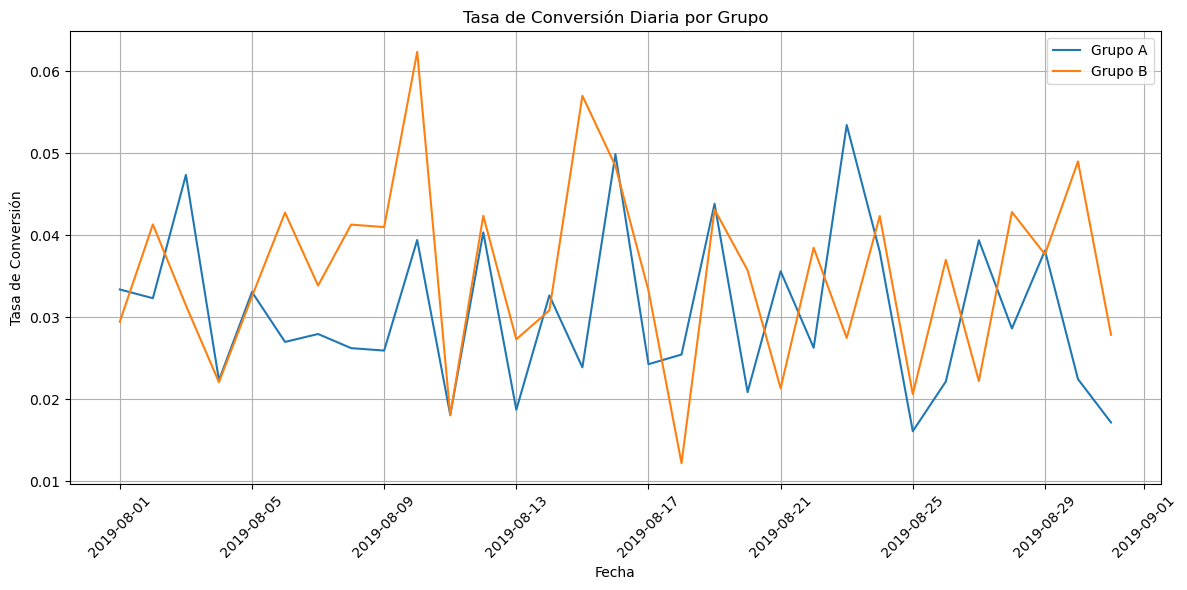

In [110]:
# Graficar las tasas de conversión diarias por grupo
plt.figure(figsize=(12, 6))
for group in daily_data['group'].unique():
    group_data = daily_data[daily_data['group'] == group]
    plt.plot(group_data['date'], group_data['conversion_rate'], label=f'Grupo {group}')

plt.title('Tasa de Conversión Diaria por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


La tasa de conversión fluctúa mucho entre ambos grupos, marcando superioridad entre un grupo y otro, siendo más consistente en el grupo B.

### 5. Traza un gráfico de dispersión del número de pedidos por usuario.

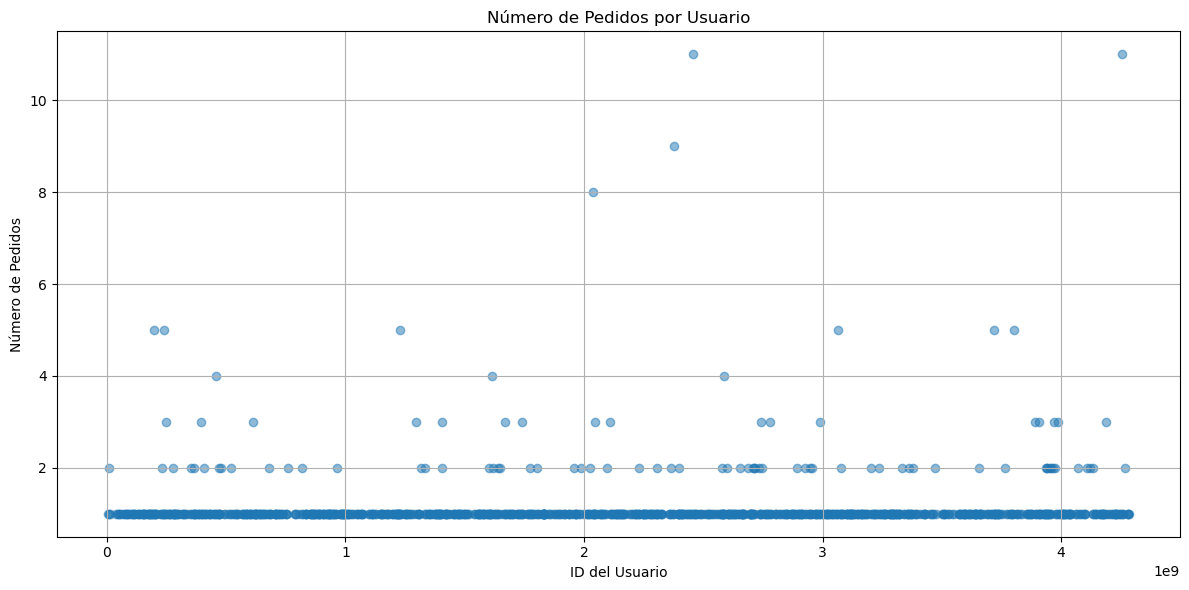

In [111]:
# Calcular el número de pedidos por usuario
orders_per_user = orders.groupby('visitorid').size().reset_index(name='orders')

# Graficar el número de pedidos por usuario
plt.figure(figsize=(12, 6))
plt.scatter(orders_per_user['visitorid'], orders_per_user['orders'], alpha=0.5)
plt.title('Número de Pedidos por Usuario')
plt.xlabel('ID del Usuario')
plt.ylabel('Número de Pedidos')
plt.grid()
plt.tight_layout()
plt.show()

Podemos apreciar en el gráfico que la gran mayoría de los usurios realizan un solo pedido, pero un gran número aún realiza dos.
Según el gráfico, podemos establecer el límite para pedidos anormales entre 3 y 5.

### 6. Calcula los percentiles 95 y 99 del número de pedidos por usuario.

In [112]:
print(np.percentile(orders_per_user['orders'], [95, 99]))

[2. 4.]


In [113]:
abnormal_users = orders_by_user[orders_by_user['orders'] > 4]['visitorid']
print("Usuarios anómalos (con más de 4 pedidos):", abnormal_users.values)

Usuarios anómalos (con más de 4 pedidos): [ 199603092  237748145 1230306981 2038680547 2378935119 2458001652
 3062433592 3717692402 3803269165 4256040402]


### 7. Traza un gráfico de dispersión de los precios de los pedidos.

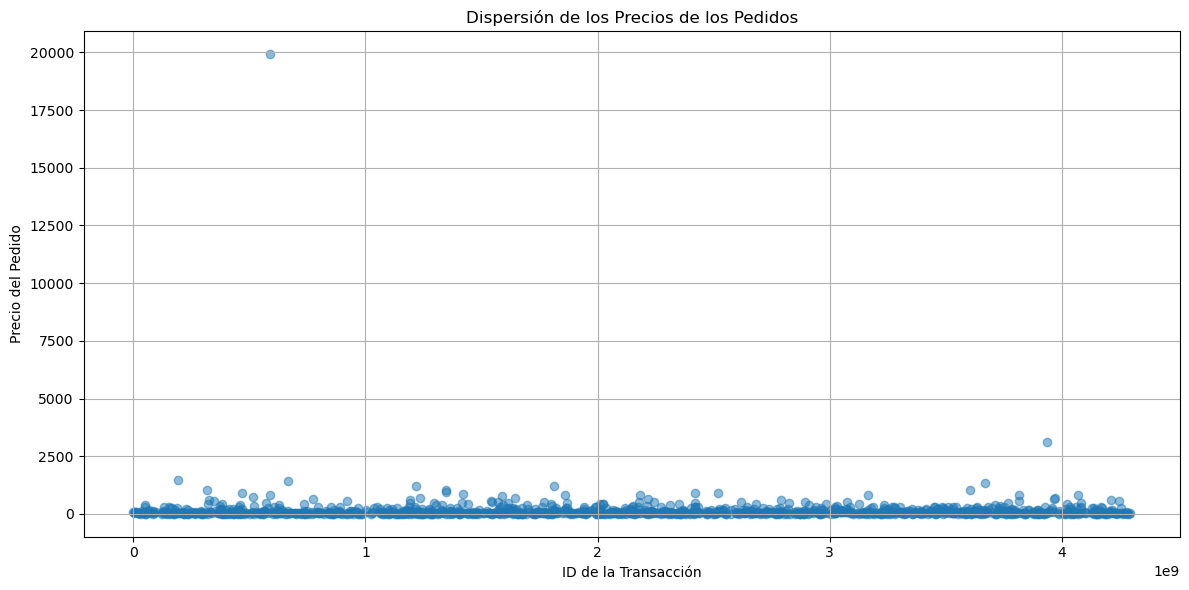

In [114]:
plt.figure(figsize=(12, 6))
plt.scatter(orders['transactionid'], orders['revenue'], alpha=0.5)
plt.title('Dispersión de los Precios de los Pedidos')
plt.xlabel('ID de la Transacción')
plt.ylabel('Precio del Pedido')
plt.grid()
plt.tight_layout()
plt.show()

### 8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define

In [115]:
print(np.percentile(orders['revenue'], [95, 99]))

[435.54  900.904]


In [116]:
abnormal_orders = orders[orders['revenue'] > 900]

print("Pedidos anómalos (precios superiores al percentil 99):")
print(abnormal_orders)

Pedidos anómalos (precios superiores al percentil 99):
      transactionid   visitorid       date  revenue group
425       590470918  1920142716 2019-08-19  19920.4     B
662      1811671147  4266935830 2019-08-29   1220.2     A
682      1216533772  4266935830 2019-08-29   1220.2     B
743      3603576309  4133034833 2019-08-09   1050.0     A
744      3668308183   888512513 2019-08-27   1335.6     B
858       192721366  1316129916 2019-08-27   1450.2     A
873      2519737434  4256040402 2019-08-08    900.7     B
940      2420050534  4003628586 2019-08-08    905.8     B
949      1347999392   887908475 2019-08-21    930.0     A
1029      469609643  2378935119 2019-08-10    900.7     A
1099      316924019   148427295 2019-08-12   1015.9     A
1103     1348774318  1164614297 2019-08-12   1025.8     A
1136      666610489  1307669133 2019-08-13   1425.8     A
1196     3936777065  2108080724 2019-08-15   3120.1     B


### 9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.

In [117]:
orders_by_users_A = orders[orders['group'] == 'A'].groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique})
orders_by_users_A.columns = ['visitorid', 'orders']

# Filtrar y agrupar los datos de pedidos por usuario para el grupo B
orders_by_users_B = orders[orders['group'] == 'B'].groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique})
orders_by_users_B.columns = ['visitorid', 'orders']

# Crear la muestra de pedidos para el grupo A, incluyendo usuarios sin pedidos
sample_A = pd.concat([
    orders_by_users_A['orders'],
    pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(orders_by_users_A['orders'])), name='orders')
], axis=0)

# Crear la muestra de pedidos para el grupo B, incluyendo usuarios sin pedidos
sample_B = pd.concat([
    orders_by_users_B['orders'],
    pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(orders_by_users_B['orders'])), name='orders')
], axis=0)

# Prueba estadística Mann-Whitney para comparar el número de pedidos entre los grupos A y B
p_value = stats.mannwhitneyu(sample_A, sample_B)[1]
print("P-valor de la prueba Mann-Whitney:", "{0:.3f}".format(p_value))

# Calcular la diferencia relativa en el tamaño promedio de pedidos entre los grupos B y A
relative_difference = sample_B.mean() / sample_A.mean() - 1
print("Diferencia relativa en tamaño promedio de pedidos (B vs A):", "{0:.3f}".format(relative_difference))


P-valor de la prueba Mann-Whitney: 0.017
Diferencia relativa en tamaño promedio de pedidos (B vs A): 0.138


- Significancia estadística: Con el p-valor de 0.017, podemos decir que la diferencia en la conversión no es aleatoria.
- Impacto en el tamaño promedio de pedidos: El grupo B muestra una mejora del 13.8% en comparación con el grupo A, lo que podría indicar un cambio beneficioso en el comportamiento de compra.
- Conclusión preliminar: Estos resultados respaldan una diferencia positiva en la conversión para el grupo B, lo que sugiere que, de ser consistente, el cambio aplicado a B podría aumentar los ingresos promedio.

### 10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.

In [118]:
# Filtrar los montos de pedidos para cada grupo
order_amounts_A = orders[orders['group'] == 'A']['revenue']
order_amounts_B = orders[orders['group'] == 'B']['revenue']

# Prueba estadística Mann-Whitney para comparar los tamaños promedio de pedido entre los grupos A y B
p_value = stats.mannwhitneyu(order_amounts_A, order_amounts_B)[1]
print("P-valor de la prueba Mann-Whitney para tamaño promedio de pedido:", "{0:.3f}".format(p_value))

# Calcular la diferencia relativa en el tamaño promedio de pedido entre los grupos B y A
relative_difference = order_amounts_B.mean() / order_amounts_A.mean() - 1
print("Diferencia relativa en tamaño promedio de pedido (B vs A):", "{0:.3f}".format(relative_difference))


P-valor de la prueba Mann-Whitney para tamaño promedio de pedido: 0.692
Diferencia relativa en tamaño promedio de pedido (B vs A): 0.252


- Significancia Estadística: El p-valor de 0.692 indica que no hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B cuando se utilizan los datos en bruto. Este p-valor es considerablemente superior al umbral común de 0.05, lo que implica que cualquier diferencia observada en el tamaño promedio de pedido podría deberse al azar en lugar de a una verdadera variación entre los grupos.

- Diferencia Relativa: La diferencia relativa de 0.252 (25.2%) es considerable en términos de porcentaje, pero no es estadísticamente significativa en este caso.

- Conclusión: No hay suficiente evidencia estadística para afirmar que el tamaño promedio de pedido difiere significativamente entre los grupos en los datos en bruto.

### 11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados.

In [119]:
# Definir percentiles para encontrar usuarios anómalos
orders_by_user = orders.groupby('visitorid').agg({'transactionid': 'nunique'}).reset_index()
orders_by_user.columns = ['visitorid', 'orders']
order_count_percentile_99 = np.percentile(orders_by_user['orders'], 99)

# Encontrar usuarios anómalos basados en el percentil 99
abnormal_users = orders_by_user[orders_by_user['orders'] > order_count_percentile_99]['visitorid']

# Crear muestra filtrada para el grupo A
sample_A_filtered = pd.concat([
    orders_by_users_A[np.logical_not(orders_by_users_A['visitorid'].isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(orders_by_users_A['orders'])), name='orders')
], axis=0)

# Crear muestra filtrada para el grupo B
sample_B_filtered = pd.concat([
    orders_by_users_B[np.logical_not(orders_by_users_B['visitorid'].isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(orders_by_users_B['orders'])), name='orders')
], axis=0)

# Prueba de Mann-Whitney para comparar la conversión filtrada entre los grupos A y B
p_value_filtered_conversion = stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]
print("P-valor de la prueba Mann-Whitney para conversión filtrada:", "{0:.3f}".format(p_value_filtered_conversion))

# Calcular la diferencia relativa en la conversión promedio entre los grupos B y A en los datos filtrados
relative_difference_filtered_conversion = sample_B_filtered.mean() / sample_A_filtered.mean() - 1
print("Diferencia relativa en conversión promedio (B vs A) con datos filtrados:", "{0:.3f}".format(relative_difference_filtered_conversion))


P-valor de la prueba Mann-Whitney para conversión filtrada: 0.016
Diferencia relativa en conversión promedio (B vs A) con datos filtrados: 0.150


- Significancia Estadística: El p-valor de 0.016 indica que hay una diferencia estadísticamente significativa en la conversión entre los grupos A y B, ya que el valor está por debajo del umbral común de significancia de 0.05. Esto significa que es poco probable que la diferencia en conversión observada sea producto del azar.

- Diferencia Relativa en Conversión: La diferencia relativa de 0.150 (15%) significa que el grupo B tiene una conversión promedio un 15% superior en comparación con el grupo A después de haber filtrado a los usuarios anómalos. Este es un aumento considerable y podría ser significativo desde una perspectiva comercial, dependiendo de los objetivos del test.

- Con estos resultados, podrías justificar el detener el test y considerar al grupo B como líder en términos de conversión, ya que la diferencia es estadísticamente significativa y favorable para el grupo B. Sin embargo, otros factores como el costo de implementación y el análisis del tamaño de pedido promedio deberían también influir en la decisión final.

### 12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados.

In [120]:
# Filtrar datos para el grupo A y B, excluyendo usuarios anómalos
orders_filtered_A = orders[np.logical_and(orders['group'] == 'A', ~orders['visitorid'].isin(abnormal_users))]
orders_filtered_B = orders[np.logical_and(orders['group'] == 'B', ~orders['visitorid'].isin(abnormal_users))]

# Prueba Mann-Whitney para el tamaño promedio de pedido entre los grupos A y B con datos filtrados
p_value_filtered_order_size = stats.mannwhitneyu(orders_filtered_A['revenue'], orders_filtered_B['revenue'])[1]
print("P-valor de la prueba Mann-Whitney para el tamaño promedio de pedido filtrado:", "{0:.3f}".format(p_value_filtered_order_size))

# Calcular la diferencia relativa en el tamaño promedio de pedido entre los grupos B y A en los datos filtrados
relative_difference_filtered_order_size = orders_filtered_B['revenue'].mean() / orders_filtered_A['revenue'].mean() - 1
print("Diferencia relativa en tamaño promedio de pedido (B vs A) con datos filtrados:", "{0:.3f}".format(relative_difference_filtered_order_size))


P-valor de la prueba Mann-Whitney para el tamaño promedio de pedido filtrado: 0.948
Diferencia relativa en tamaño promedio de pedido (B vs A) con datos filtrados: 0.232


- Significancia Estadística: El p-valor de 0.948 sugiere que no existe una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B después de excluir a los usuarios anómalos. Este valor está muy por encima del umbral común de significancia (0.05), lo que indica que la diferencia observada podría deberse al azar.

- Diferencia Relativa en el Tamaño Promedio de Pedido: Aunque el tamaño promedio de pedido en el grupo B es un 23.2% mayor en comparación con el grupo A, esta diferencia no es estadísticamente significativa. Por lo tanto, no se puede concluir que el grupo B tenga un tamaño de pedido promedio mayor de forma concluyente a partir de estos datos filtrados.

- Estos resultados no apoyan una diferencia significativa en el tamaño promedio de pedido entre los grupos. Esto significa que, si bien el grupo B mostró una mejora en la conversión, el impacto en el tamaño de pedido promedio es incierto. En función de tus objetivos, podrías considerar al grupo B como el líder en términos de conversión, pero la decisión debería equilibrarse con el análisis de otros factores, como la rentabilidad por cliente y el costo de adquisición.

### 13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

## Con base en los resultados de los análisis estadísticos y las diferencias observadas entre los grupos A y B, la decisión recomendada es:

### Decisión: Parar la prueba y considerar al grupo B como líder.

### Justificación:
1. **Conversión**: El análisis de conversión mostró una diferencia estadísticamente significativa, con el grupo B obteniendo una conversión un 15% mayor que el grupo A en los datos filtrados. Este aumento en la conversión es estadísticamente significativo (p-valor de 0.016) y comercialmente relevante, lo cual indica que el grupo B podría generar más ventas en comparación con el grupo A.

2. **Tamaño Promedio de Pedido**: Aunque el tamaño promedio de pedido en el grupo B fue un 23.2% mayor que en el grupo A, esta diferencia no fue estadísticamente significativa (p-valor de 0.948). Esto indica que, aunque B tiene una ventaja en tamaño promedio, no se puede asegurar que esta ventaja se mantenga de manera consistente en condiciones normales.

3. **Balance de Resultados**: El grupo B muestra una ventaja clara y significativa en la métrica de conversión, que es un objetivo clave en muchos tests A/B. La falta de significancia en el tamaño promedio de pedido no es un motivo suficiente para continuar la prueba, ya que la diferencia de conversión es el hallazgo más importante en este caso.

### Conclusión Final:
Parar la prueba y considerar al grupo B como el grupo líder. Esta decisión aprovecha el aumento en conversión significativo, lo cual puede ser beneficioso en términos de volumen de ventas, y el tamaño promedio de pedido, aunque no es estadísticamente superior, aún sugiere un potencial positivo en el grupo B.